# Propagation of Hollow Core waveguide at low loss wavelength

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact, plotlogf, plotlogf_real
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

# Setup Waveguide and input fields

In [2]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06

In [3]:
A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 1, 6.5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=loss_min_wl)

In [4]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [5]:
# Set input function
f0 = quadratic_piecewise

# Set input field type
field_type = 'TE'

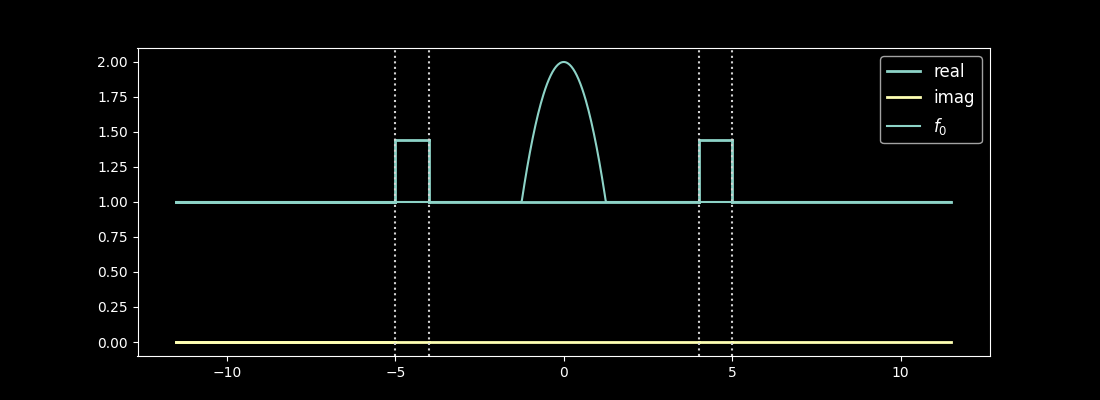

In [6]:
A.plot_refractive_index(color='cornflowerblue', linewidth=2);
A.add_1d_plot(lambda x: f0(x) + 1, label='$f_0$')

# Guided Portion

Based on info below, we found the actual guided mode near K_low

In [7]:
mode_type = 'guided'
k_low = A.K_low

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

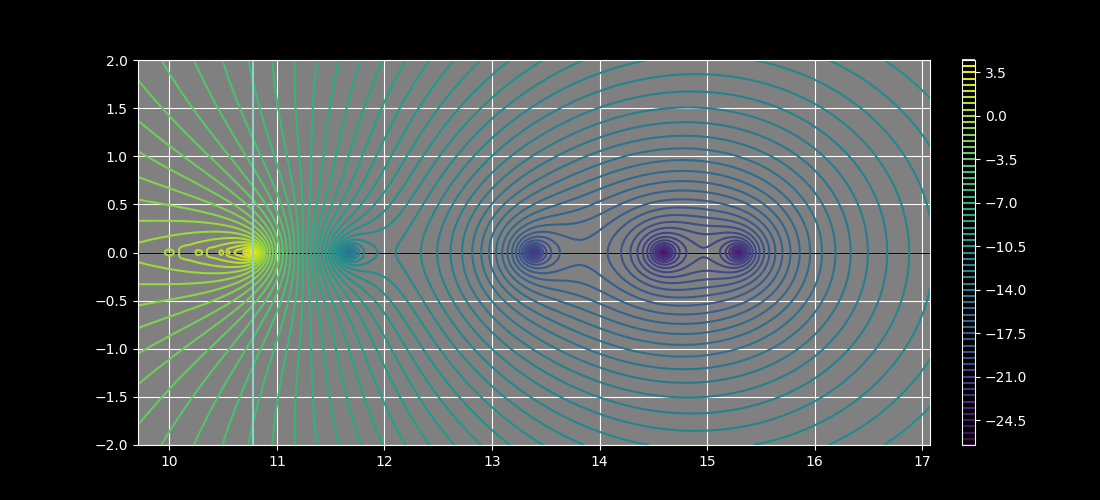

In [11]:
A.determinant_plot(.9*A.K_low, 1.1*A.K_high, -2, 2, plane='Beta')

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

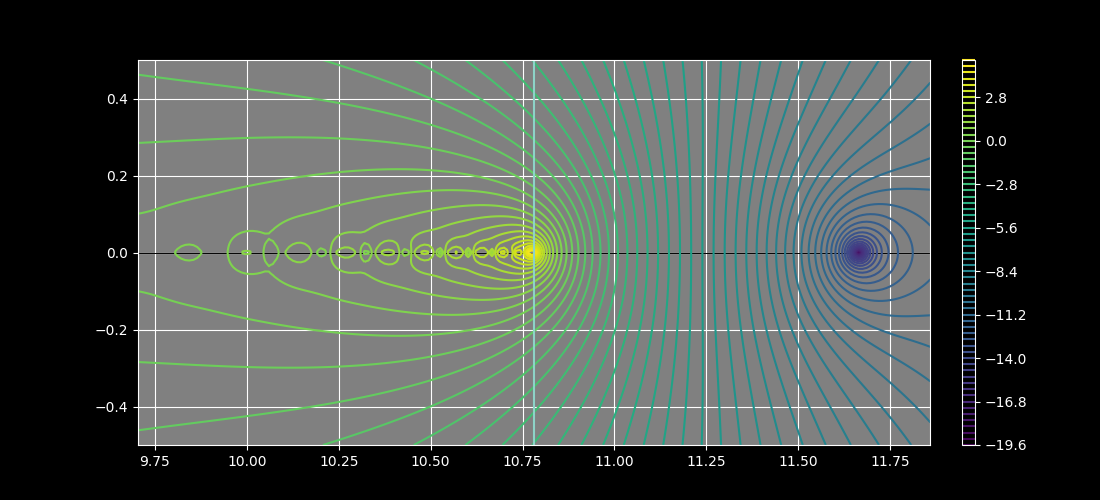

In [17]:
A.determinant_plot(.9*A.K_low, 1.1*A.K_low, -.5, .5,  plane='Beta')

In [18]:
beta1 = newton(A.determinant, 11.6, args=(mode_type, 'Beta'))
print(abs(A.determinant(beta1, plane='Beta')))
plt.plot(beta1.real, beta1.imag, marker='o')
beta1

[1.84939838e-19]


array([11.6642417-1.72479535e-18j])

In [19]:
Fs1 = A.fields(beta1, plane='Beta')


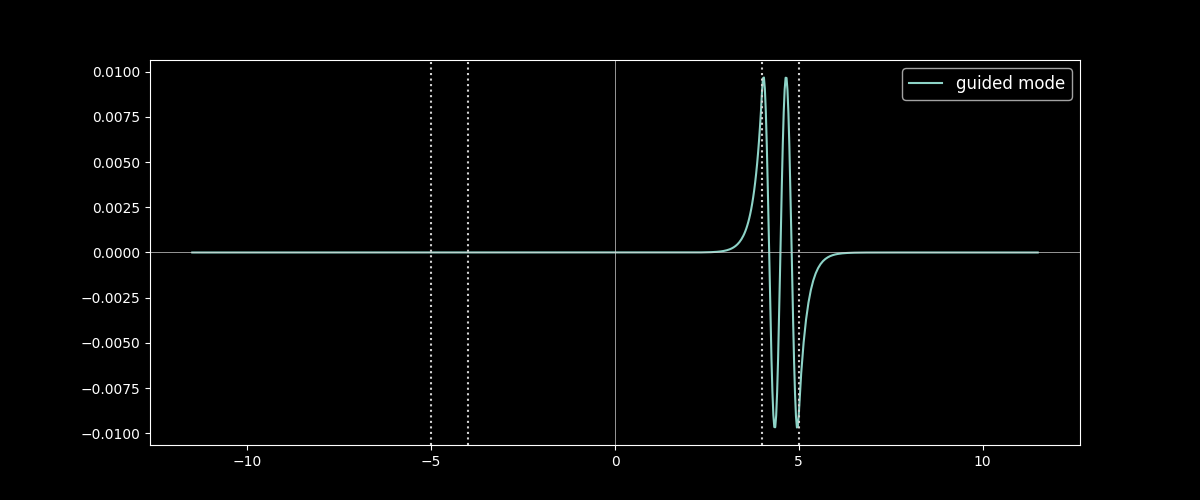

In [20]:
A.plot_field_1d(Fs1, label='guided mode');


## Get coefficient of guided mode


In [25]:
from scipy.integrate import quad
integrand = lambda x: Fs1(x)**2
cf1 = quad(integrand, -3, 6, complex_func=True)[0].real
cf1

-1.3613792223758706e-05

In [22]:
integrand = lambda x: f0(x) * Fs1(x)
cf2 = quad(integrand, -.5, .5, complex_func=True)[0].real
cf2

3.1118665814246895e-10

In [23]:
alpha = cf2/cf1
alpha

-2.2856451156849404e-05

For non-toy example case, none of the guided modes significantly overlap the input function at non-resonant input frequencies.

# Propagate Radiation Field

In [16]:
Propagator_Class = A.propagator()


### Propagating Portion

This part takes a lot of resolution in this case

In [17]:
paper_method = True

#### Spike 1

In [18]:
# P_prop1 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=0.005, RZ=.385, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop1 = Propagator_Class(A.real_contour(0.005, .385, 60), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')


In [19]:
# P_prop1_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=0.385, RZ=.42, NZ=200, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop1_5 = Propagator_Class(A.real_contour(0.385, .42, 80), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

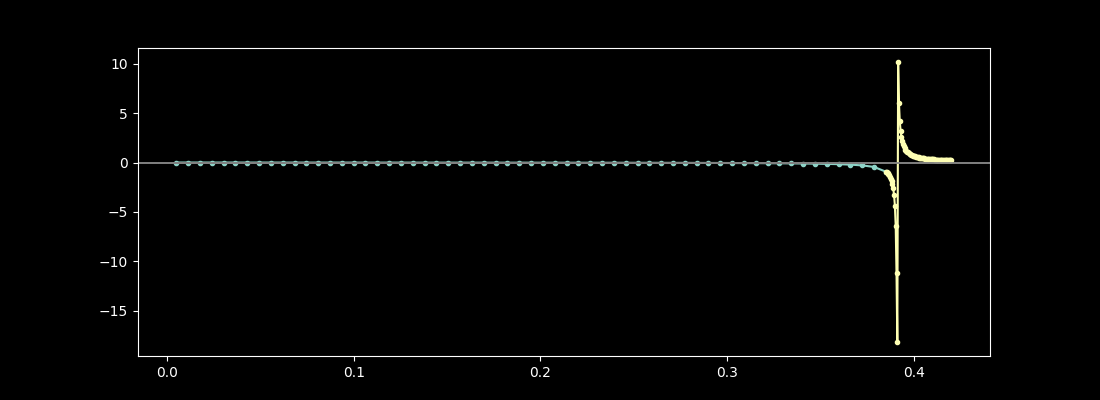

In [20]:
plt.close('all')
fig, ax = P_prop1.plot_transform(xs=P_prop1.Zs.real);
P_prop1_5.plot_transform(xs=P_prop1_5.Zs, ax=ax);

#### Spike 2

In [21]:
# P_prop2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=.42, RZ=1.14, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop2 = Propagator_Class(A.real_contour(.42, 1.14, 60), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [22]:
# P_prop2_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.14, RZ=1.3, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop2_5 = Propagator_Class(A.real_contour(1.14, 1.3, 60), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

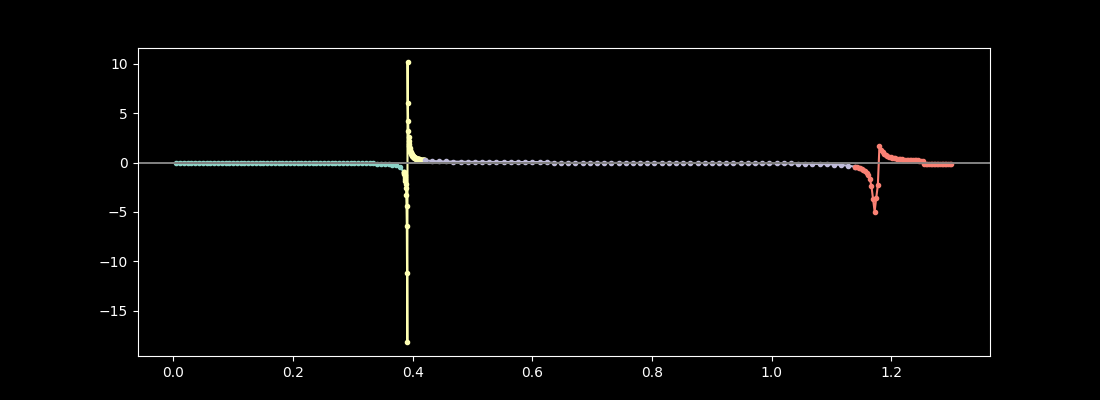

In [23]:
plt.close('all')
fig, ax = P_prop1.plot_transform(xs=P_prop1.Zs.real);
P_prop1_5.plot_transform(xs=P_prop1_5.Zs, ax=ax);
P_prop2.plot_transform(xs=P_prop2.Zs.real, ax=ax);
P_prop2_5.plot_transform(xs=P_prop2_5.Zs, ax=ax);

#### Spike 3

In [24]:
# P_prop3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.3, RZ=1.85, NZ=80, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop3 = Propagator_Class(A.real_contour(1.3, 1.85, 60), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [25]:
# P_prop3_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.85, RZ=2.05, NZ=40, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop3_5 = Propagator_Class(A.real_contour(1.85, 2.05, 50), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

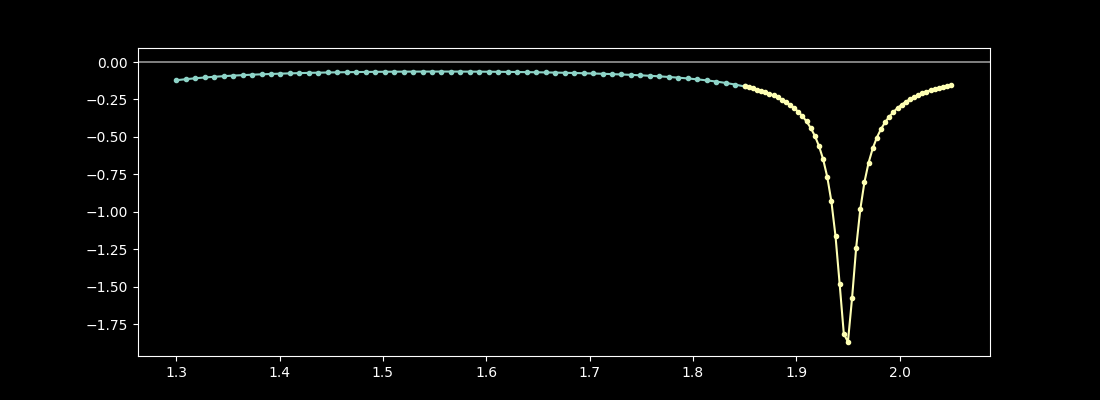

In [26]:
plt.close('all')
fig, ax = P_prop3.plot_transform(xs=P_prop3.Zs.real);
P_prop3_5.plot_transform(xs=P_prop3_5.Zs, ax=ax);

#### Spike 4

In [27]:
# P_prop4 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.05, RZ=2.65, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop4 = Propagator_Class(A.real_contour(2.05, 2.65, 50), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [28]:
# P_prop4_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.65, RZ=2.8, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop4_5 = Propagator_Class(A.real_contour(2.65, 2.8, 50), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

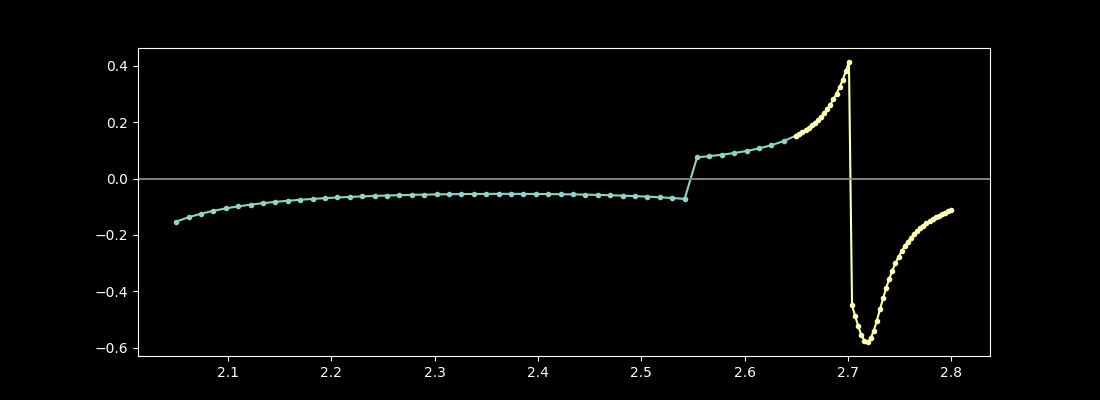

In [29]:
plt.close('all')
fig, ax = P_prop4.plot_transform(xs=P_prop4.Zs.real);
P_prop4_5.plot_transform(xs=P_prop4_5.Zs, ax=ax);

#### Spike 5

In [30]:
# P_prop5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=2.8, RZ=3.42, NZ=50, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop5 = Propagator_Class(A.real_contour(2.8, 3.42, 50), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [31]:
# P_prop5_5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3.42, RZ=3.52, NZ=40, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop5_5 = Propagator_Class(A.real_contour(3.42, 3.52, 20), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

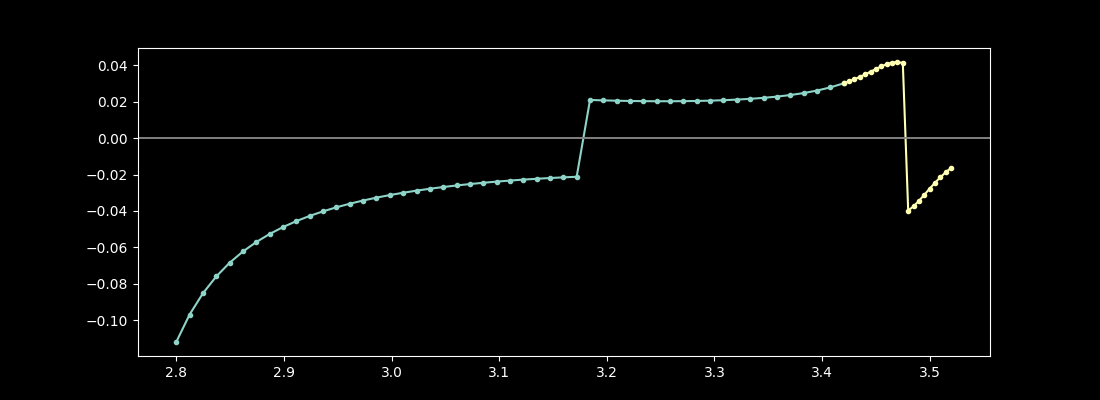

In [32]:
plt.close('all')
fig, ax = P_prop5.plot_transform(xs=P_prop5.Zs.real);
P_prop5_5.plot_transform(xs=P_prop5_5.Zs, ax=ax);

#### Spike 6 and rest of propagating portion

In [33]:
# P_prop6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3.52, RZ=4.5, NZ=70, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop6 = Propagator_Class(A.real_contour(3.52, 4.5, 50), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [34]:
# P_prop7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=4.5, RZ=A.Z_evanescent.real, NZ=120, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_prop7 = Propagator_Class(A.real_contour(4.5, A.Z_evanescent.real, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

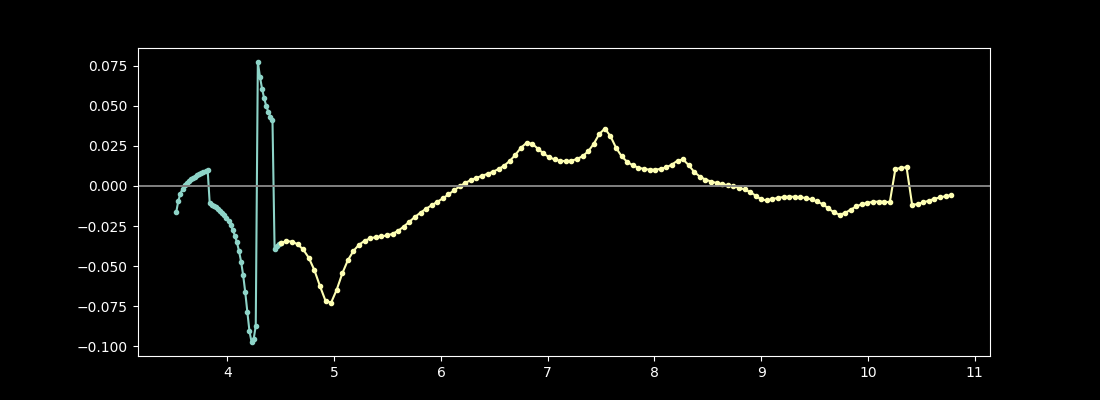

In [35]:
plt.close('all')
fig, ax = P_prop6.plot_transform(xs=P_prop6.Zs.real);
P_prop7.plot_transform(xs=P_prop7.Zs, ax=ax);

### Evanescent Portion

In [36]:
# P_ev = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_ev = Propagator_Class(A.real_contour(A.Z_evanescent.real, 14, 80), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

In [37]:
# P_ev2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=14, RZ=2*A.Z_evanescent.real, NZ=100, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P_ev2 = Propagator_Class(A.real_contour(14, 2*A.Z_evanescent.real, 80), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

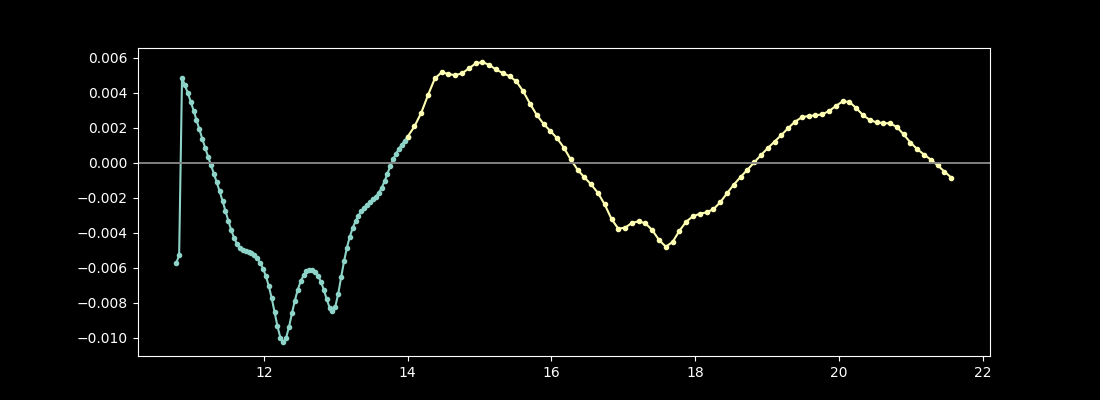

In [38]:
plt.close('all')
fig, ax = P_ev.plot_transform(xs=P_ev.Zs.real);
P_ev2.plot_transform(xs=P_ev2.Zs.real, ax=ax);

In [39]:
propfuncs = [
    P_prop1, 
    P_prop1_5, 
    P_prop2, 
    P_prop2_5, 
    P_prop3, 
    P_prop3_5, 
    P_prop4, 
    P_prop4_5, 
    P_prop5, 
    P_prop5_5, 
    P_prop6, 
    P_prop7,
]

evfuncs = [
    P_ev, 
    P_ev2
]

## Full transform Plot

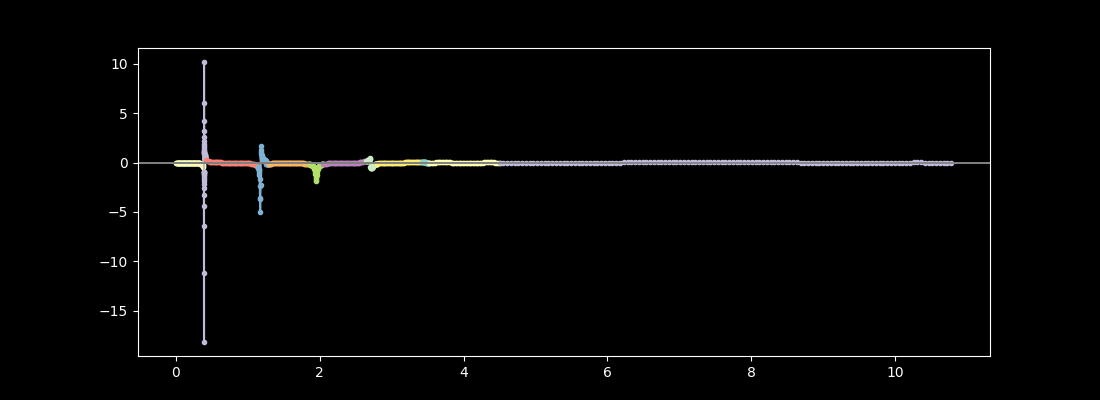

In [40]:
plt.close('all')
fig, ax = P_prop1.plot_transform(xs=P_prop1.Zs.real);

for P in propfuncs:
    P.plot_transform(xs=P.Zs, ax=ax);
# P_prop1_5.plot_transform(xs=P_prop1_5.Zs, ax=ax);
# P_prop2.plot_transform(xs=P_prop2.Zs.real, ax=ax);
# P_prop2_5.plot_transform(xs=P_prop2_5.Zs, ax=ax);

# Cross sections at input


In [41]:
prop = lambda x: sum([f.slice_propagate(x) for f in propfuncs])
ev = lambda x: sum([f.slice_propagate(x) for f in evfuncs]) 
full = lambda x: prop(x) + ev(x)

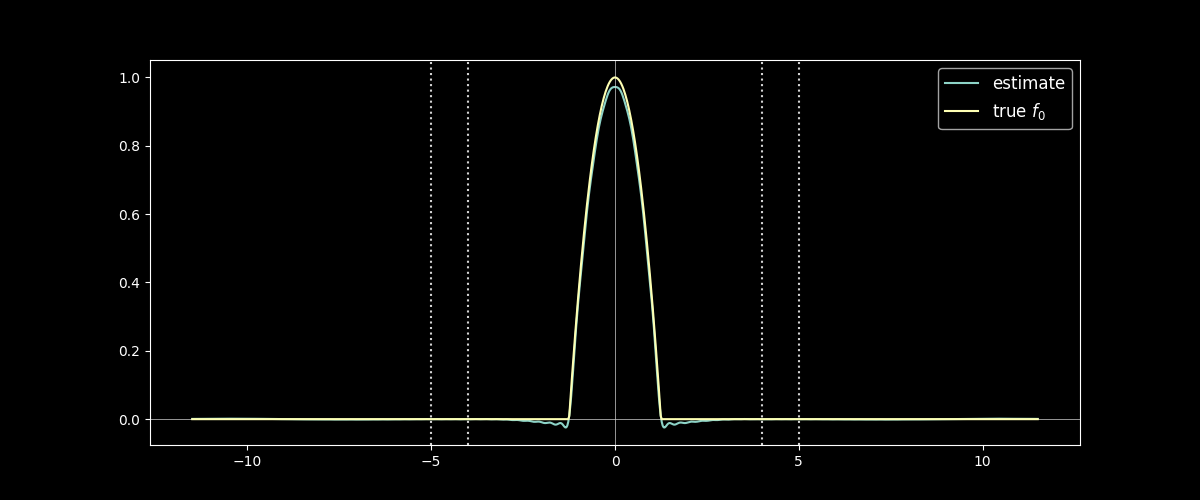

In [42]:
A.plot_field_1d(full, label='estimate') 
A.add_1d_plot(f0, label='true $f_0$')
# plt.gca().set_xlim(-3,3)

# 2D Filled Contour Plots

In [43]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [44]:
# Setting Xs, useful to differentiate resolution between regions
B = SlabExact(scale=1e-5, Ts=[10, 1, 8, 1, 10],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[30, 8, 40, 8, 30],
              symmetric=True, wl=loss_min_wl)

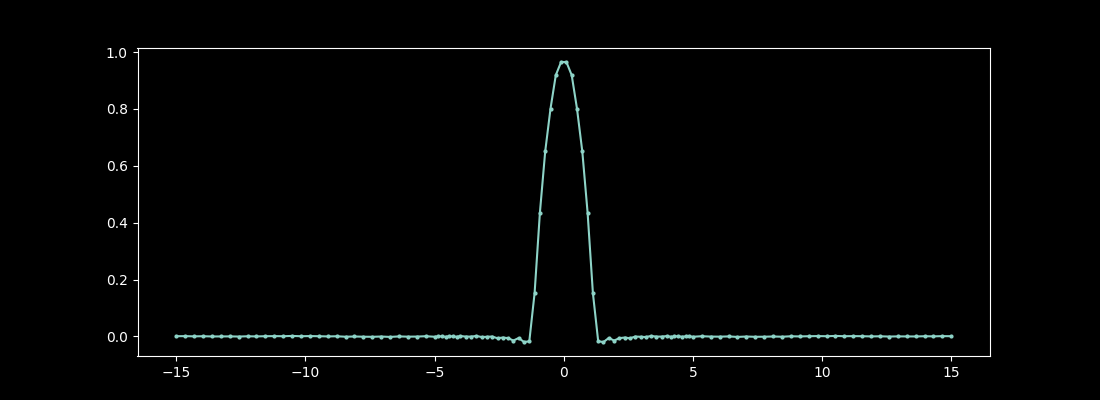

In [45]:
plt.close('all')
fig = plt.figure(1, figsize=(11,4))
plt.plot(B.all_Xs, prop(B.all_Xs).real, marker='o', markersize=2);

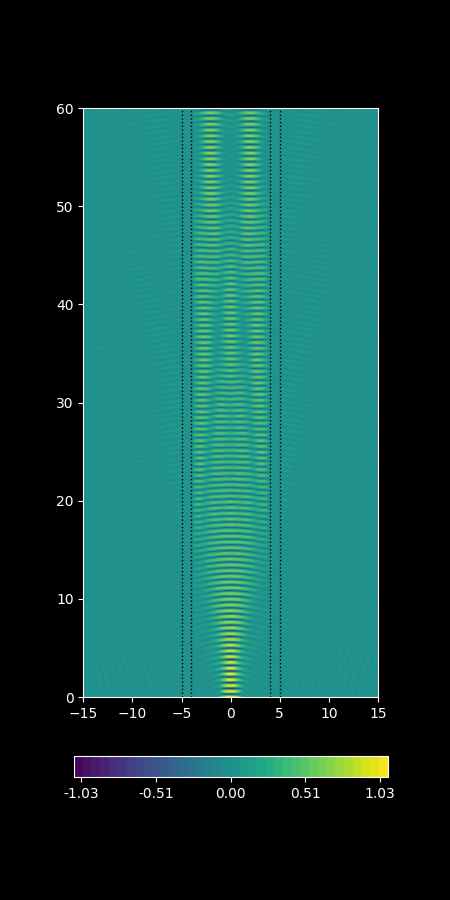

In [46]:
# Good ratio for z is 40 points per 2 units (so 20 points per unit)
zmin, zmax=0, 60
A.plot_field_2d(Full, xs=B.all_Xs, zmin=zmin,
                # colorbar=False,
                zmax=zmax, zref=int((zmax-zmin)*20),
                equal=True,
               );

# Surface Plot

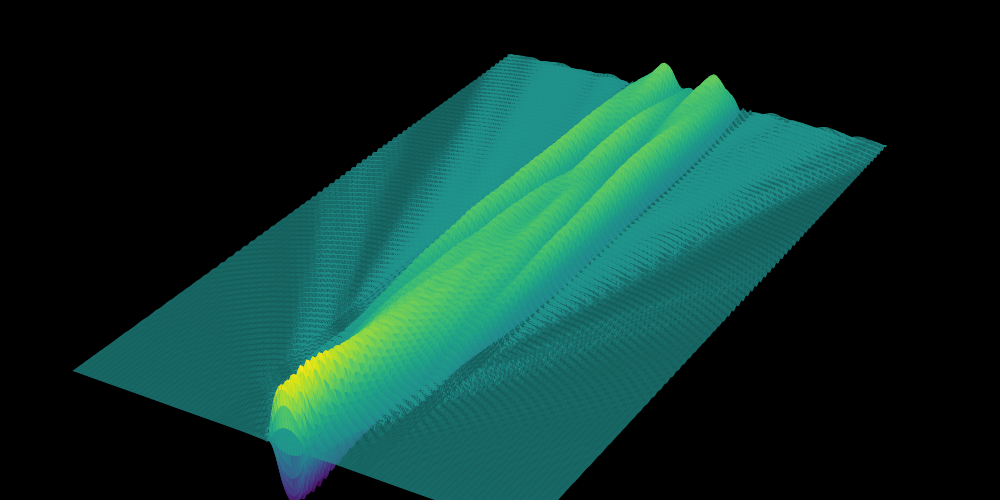

In [47]:
zmin, zmax=0, 50
A.plot_field_2d_surface(Full, xs=B.all_Xs, colorbar=False, zoom=3,
                azim=-60, elev=30, zmin=0,
                zmax=zmax, zref=int(zmax*25),
                rstride=1, cstride=1,
               );

# Leaky mode representation via contour integration


(<Figure size 1100x500 with 2 Axes>, <Axes: >)

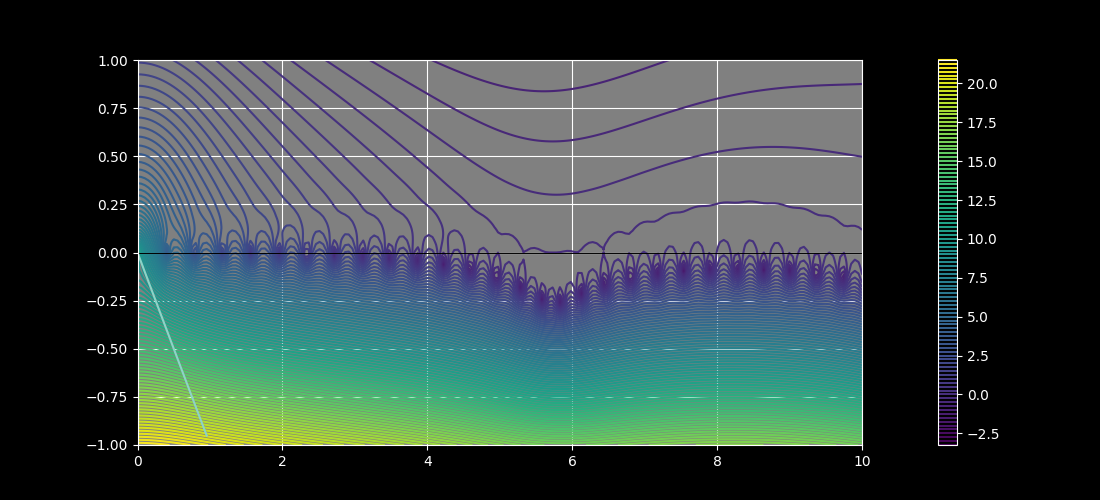

In [80]:
A.determinant_plot(0, 10, -1, 1, iref=200, rref=200, levels=100)

In [86]:
z_guesses = np.array([.4, 1.1, 1.9, 2.8, 3.5, 4.2,
                      4.98 - .125j, 5.6 - .25j, 6.15 - .2j, 6.8 - 1.2j,
                     7.5 - .1j, 8.25 - .85j, 9 - .1j, 9.75 - .13j,
                     ])
Zs = []
for z in z_guesses:
    Zs.append(newton(A.determinant_Z, z, args=(field_type, 'guided')))
Zs = np.array(Zs)

for Z in Zs:
    plt.plot(Z.real, Z.imag, marker='o')

## Construct field

In [87]:
P_leaky = []
paper_method=False

for Z in Zs:
    PZe = Propagator_Class(A.circular_contour(Z, 1e-6, 5, 'cw'), f0=f0,
                           Lx=-b, Rx=b, field_type=field_type, 
                           sign='+1', paper_method=paper_method)
    P_leaky.append(PZe)
    
    # PZo = Propagator_Class(A.circular_contour(Z, 1e-6, 5),
    #                        f0=f0, Lx=-b, Rx=b,
    #                        field_type=field_type,
    #                        sign='-1',
    #                        paper_method=paper_method)
    # P_leaky.append(PZo)

In [88]:
full_leaky = lambda x : sum([P.slice_propagate(x) for P in P_leaky])
Full_leaky = lambda x, z : sum([P.propagate(x, zs=z) for P in P_leaky])
Diff = lambda x,z : Full_leaky(x,z) - Full(x,z)

## Leaky field profile at input

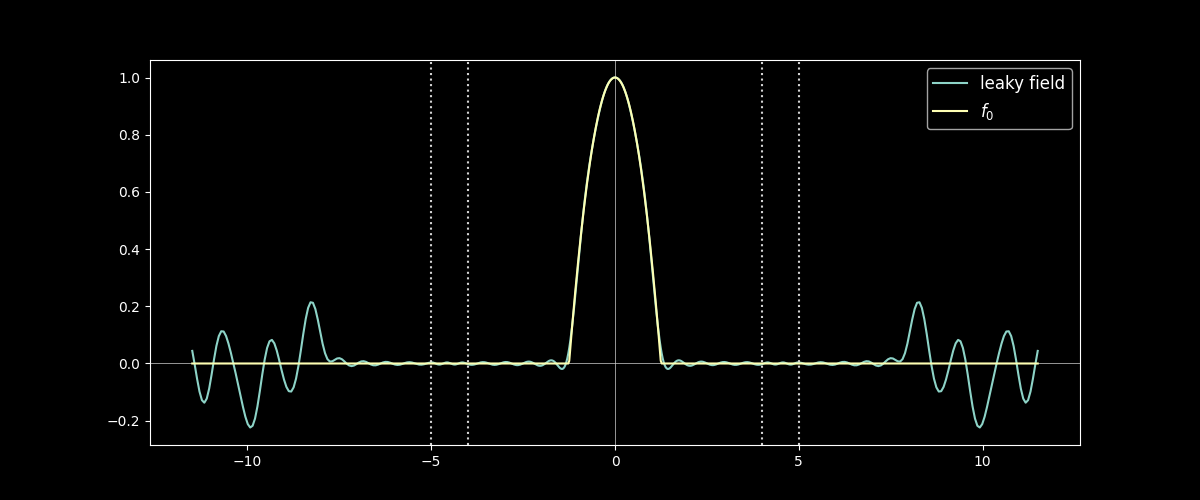

In [89]:
A.plot_field_1d(full_leaky, label='leaky field')
A.add_1d_plot(f0, label='$f_0$')

## 2D overhead plot of leaky mode field approximation

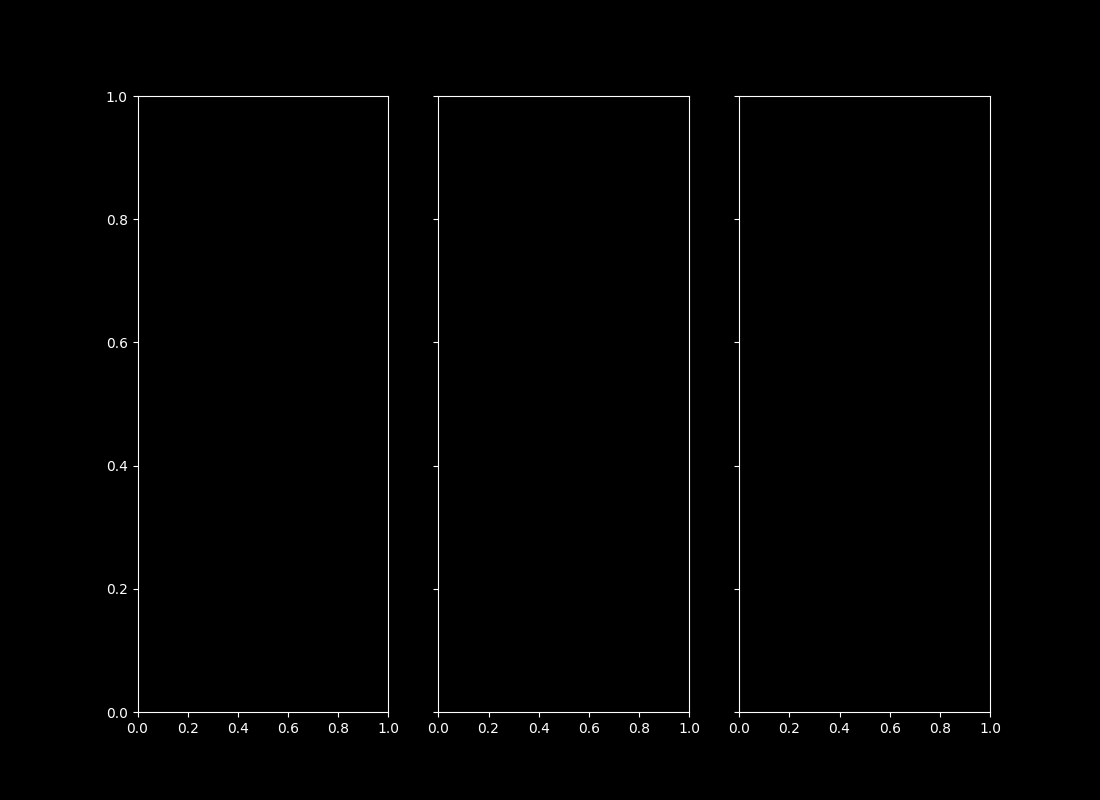

In [90]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,8))

xs = B.all_Xs

zmin = 0
zmax = 100
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)

In [91]:
A.add_2d_plot(Full, ax=ax1, xs=xs, zs=zs, plot_Rhos=True);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [92]:
A.add_2d_plot(Full_leaky, ax=ax2, xs=xs, zs=zs, plot_Rhos=True);
ax2.set_title('Leaky Mode Field')

Text(0.5, 1.0, 'Leaky Mode Field')

In [93]:
A.add_2d_plot(Diff, ax=ax3, xs=xs, zs=zs, part='norm', plot_Rhos=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [94]:
slice_at_x = 0
constant_variable = 'x'

full_z_leaky_ours = lambda z: sum([P.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for P in P_leaky])
full_z = lambda z: sum([f.slice_propagate(z, slice_at=slice_at_x, constant_variable=constant_variable) for f in propfuncs]) 

ratio = lambda z: full_z_leaky_ours(z) / full_z(z)


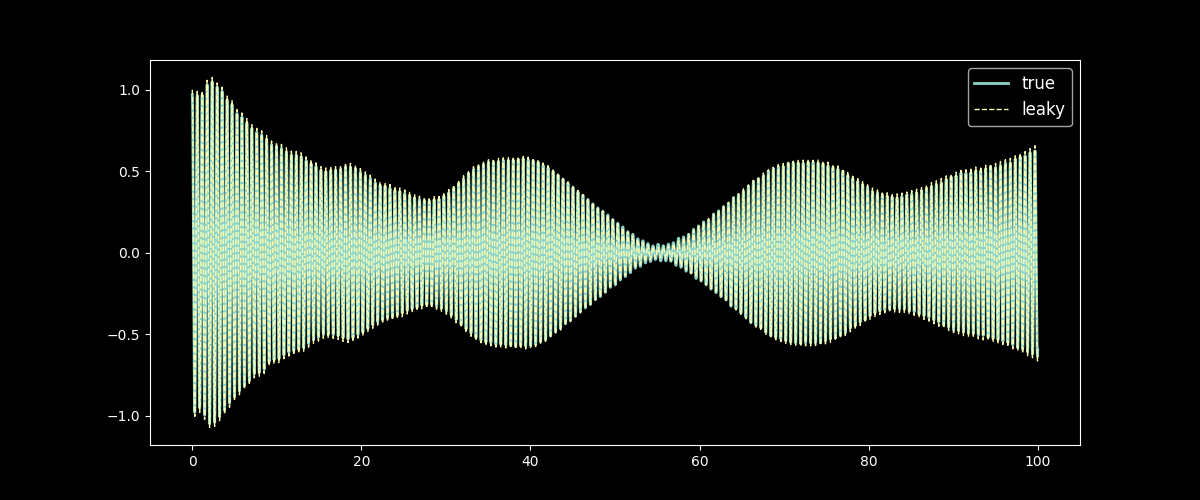

In [100]:
part = 'real'
zmin, zmax = 0, 100
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=False, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(full_z_leaky_ours, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');


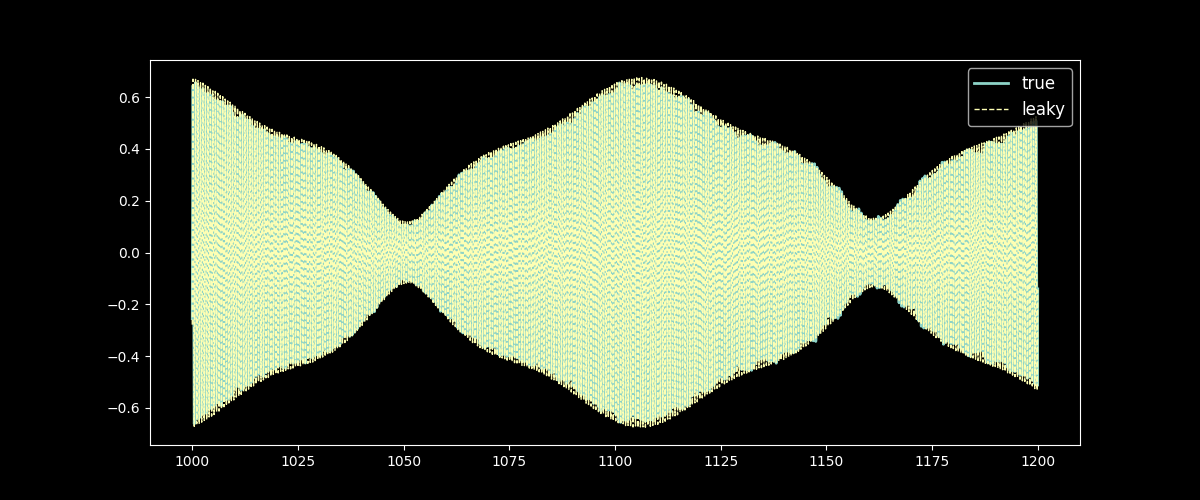

In [101]:
part = 'real'
zmin, zmax = 1000, 1200
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=False, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(full_z_leaky_ours, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky');
# A.add_1d_plot(ratio, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');


# Integral along Steepest Descent Path in Z plane

Here we examine the remaining portion of the expansion, namely the integral along the steepest descent path (SDP).

The SDP is found by keeping the imaginary part of $\beta(Z) = i \sqrt{k_0^2n_0^2 - Z^2}$ constant at $\text{Im}(\beta(0)) = k_0 n_0$.  Using $Z = x + y i$ we calculate from the complex square root formula that 

$$ y = \pm \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}}$$

along this path. Below we plot this over the determinant function.

In [102]:
def sdp(x, guide=A):
    K = guide.K0 * guide.n0
    return -(K * x) / np.sqrt(K**2 + x**2)

In [103]:
xmin, xmax= -5, .5
ymin, ymax = -1, 2
xs_sdp = np.linspace(xmin, xmax, 1000)
ys_sdp = sdp(xs_sdp)
msk = np.where((ys_sdp<ymax)*(ys_sdp>ymin))

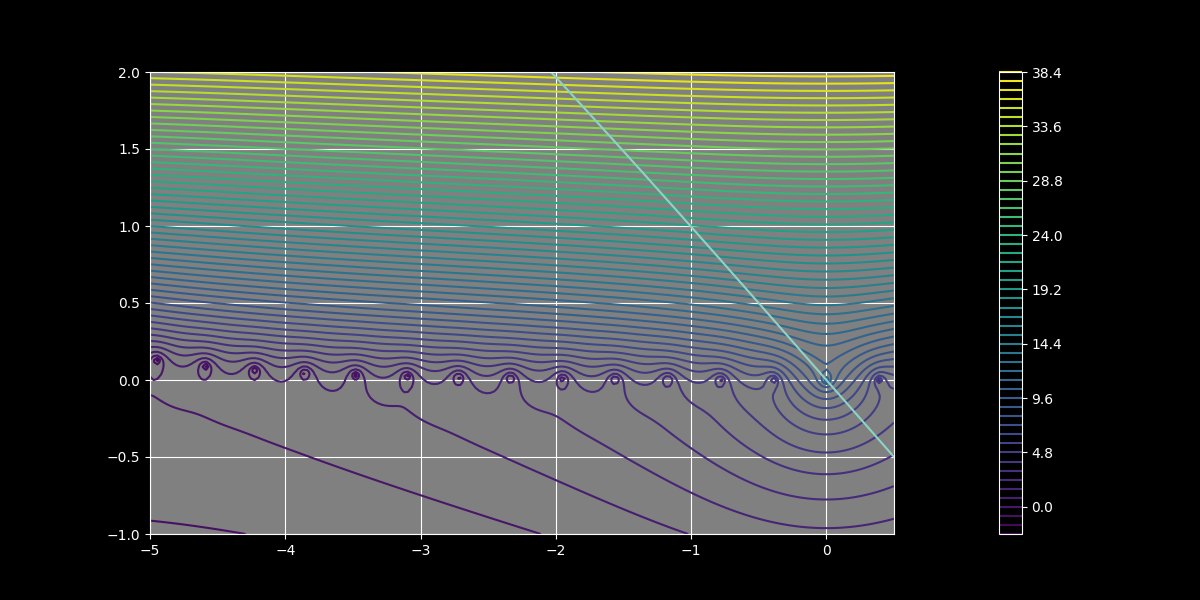

In [64]:
plotlogf(A.determinant_Z, xmin, xmax, ymin, ymax, 'TE', 'leaky', iref=200, rref=200, levels=50)
ax = plt.gca()
ax.plot(xs_sdp[msk], ys_sdp[msk]);
# ax.plot(xs[msk], -ys[msk]);

To integrate along this path, we need it's complex derivative.  Using the parameterization

$$Z(x) = x + i y(x) = x \pm i \frac{k_0 n_0 x}{\sqrt{k_0^2n_0^2 + x^2}},$$

from above, we see that the derivative is

$$ \frac{dZ}{dx} = 1 \pm i \left( \frac{k_0 n_0}{\sqrt{k_0^2n_0^2 + x^2}}\right)^3$$

## Propagate along SDP

We're building in the capabilities to do this

In [65]:
Propagator_Class = A.propagator()

In [66]:
paper_method = False

In [67]:
P_sdp1 = Propagator_Class(A.sdp_contour(-.01, -.7, 100), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')
P_sdp2 = Propagator_Class(A.sdp_contour(-.7, -2.5, 100), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method,
                     sign='+1')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

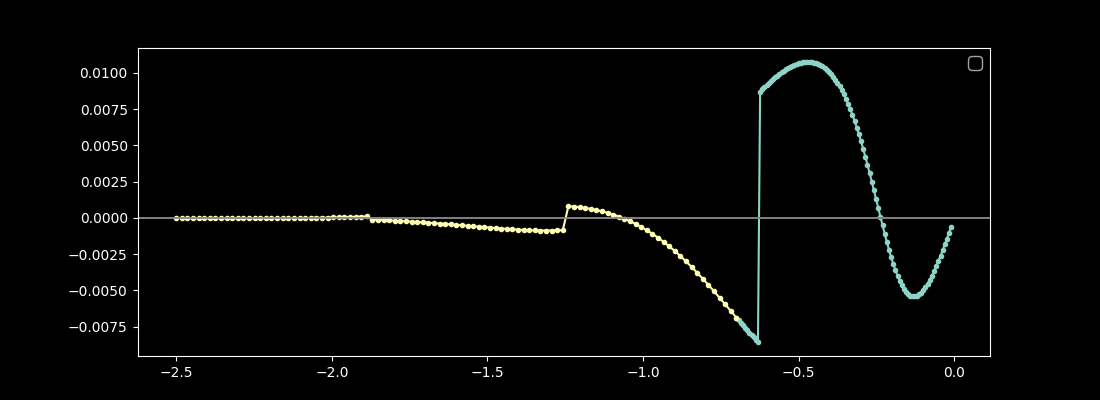

In [68]:
fig, ax = P_sdp1.plot_transform(xs=P_sdp1.Zs.real)
P_sdp2.plot_transform(ax=ax, xs=P_sdp2.Zs.real)

In [69]:
x_slice = 4.

sdp = lambda x: P_sdp1.slice_propagate(x,0) + P_sdp2.slice_propagate(x,0)
sdp_z = lambda z: P_sdp1.slice_propagate(z, x_slice, 'x') + P_sdp2.slice_propagate(z, x_slice, 'x')

Sdp = lambda x, z: P_sdp1.propagate(x, z) + P_sdp2.propagate(x, z)

/home/pv/local/slab/slab.py:1724: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


(<Figure size 1200x500 with 1 Axes>, <Axes: >)

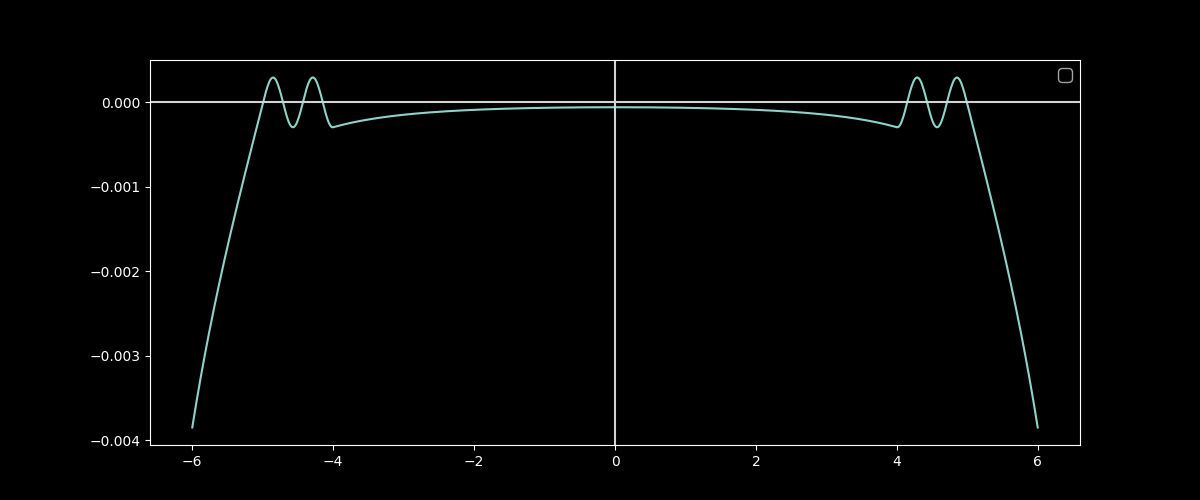

In [70]:
A.plot_field_1d(sdp, xs=np.linspace(-6,6,1000), part='imag', plot_Rhos=False)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

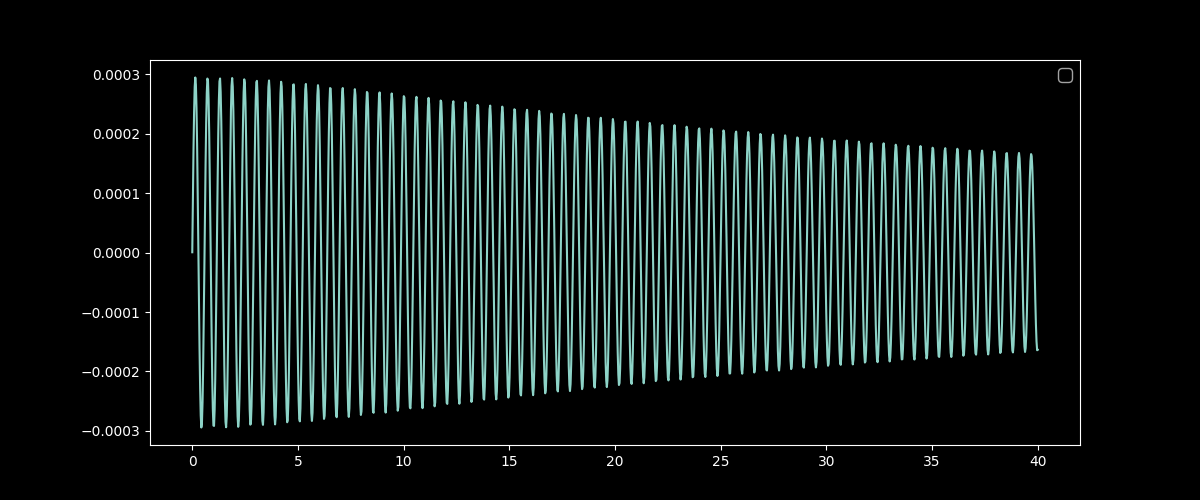

In [71]:
A.plot_field_1d(sdp_z, xs=np.linspace(0,40,1400), plot_axis=False, plot_Rhos=False)

(<Figure size 600x900 with 2 Axes>, <Axes: >)

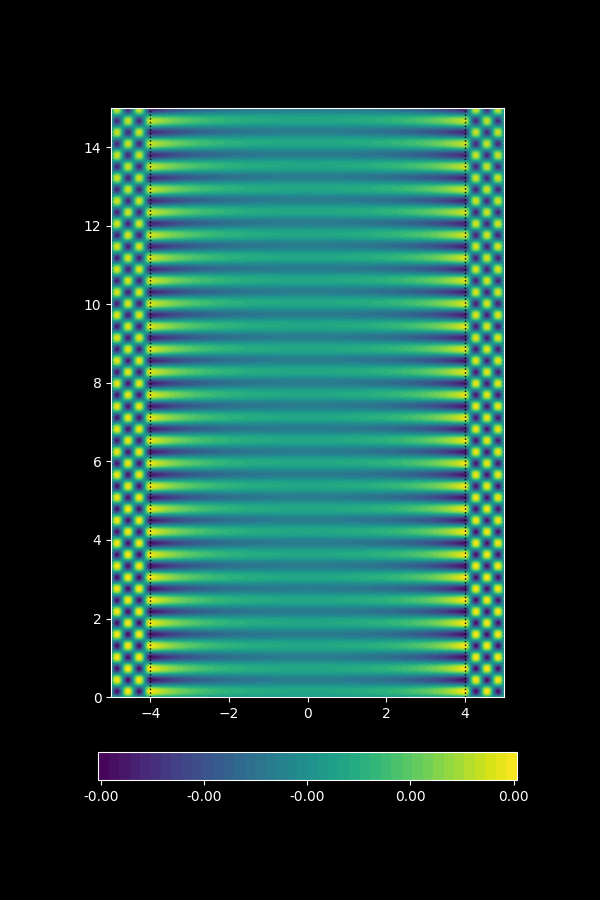

In [72]:
A.plot_field_2d(Sdp, xs=np.linspace(-5,5,1000), zmax=15, zref=1000)

In [73]:
A.plot_field_2d_surface(P_sdp1.propagate, xs=np.linspace(0, 5, 100), zmax=5, zref=200, cstride=1, rstride=1,
                       colorbar=True)

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

## Observations

- Seems that space wave is not very large in magnitude in heterogeneous regions.  Does blow up outside of that.
  
- Because of this, likely that space wave is not very important for asymptotic approximation in this case.
  
- This might not hold at other wavelengths however, in particular for large wavelengths of this waveguide there are no leaky modes between real axis as SDP, so all asymptotics would be done using space wave.

# Save data for visualization


In [504]:
xs = A.all_Xs
zs = np.linspace(0, 100, int(100*40/2))

In [505]:
f0s = f0(xs)

In [506]:
rad_ys_propagating = Prop(xs, zs)


In [507]:
rad_ys_evanescent = Ev(xs, zs)


In [508]:
# guided_ys = alpha * Fs1(xs, zs=zs)

In [509]:
Xs, Zs = np.meshgrid(xs, zs)

In [510]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [511]:
prefix='/home/pv/local/slab/apps/hollow_core/'

In [512]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [513]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [514]:
# save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [515]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [516]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [517]:
save_values_as_json(prefix + 'f0s', f0s)

In [518]:
save_values_as_json(prefix + 'x0s', xs)

# Previous leaky mode work

In [18]:
mode_type = 'leaky'
k_low = A.K_low

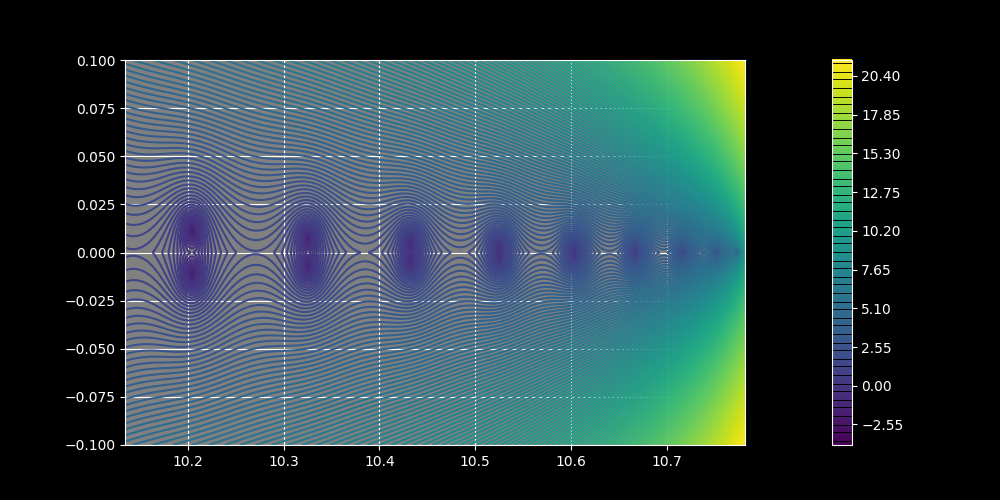

In [19]:
plotlogf(A.determinant, .94*A.K_low, 1.0001*A.K_low, -.1, .1, field_type, mode_type, 
         figsize=(10,5),iref=400, rref=400, levels=200)

### Only even modes necessary

In [20]:
beta1 = newton(A.determinant, 10.775, args=(field_type, mode_type)).conj()
beta2 = newton(A.determinant, 10.715, args=(field_type, mode_type))
beta3 = newton(A.determinant, 10.6, args=(field_type, mode_type))
beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type))
beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type))

betas = [beta1, beta2, beta3, beta4, beta5]
for beta in betas:
    plt.plot(beta.real, beta.imag, marker='o')


In [21]:
Fs1 = A.fields(beta1, field_type=field_type, mode_type=mode_type, c0=-1)
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type, c0=-1)
Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

Fs = [Fs1, Fs2, Fs3, Fs4, Fs5]

leaky
leaky
leaky
leaky
leaky


/home/pv/local/slab/slab.py:535: UserWarning: Provided mode type leaky, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


### Plotting leaky modes

#### 1D plots

/home/pv/local/slab/slab.py:1525: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)
/home/pv/local/slab/slab.py:1589: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


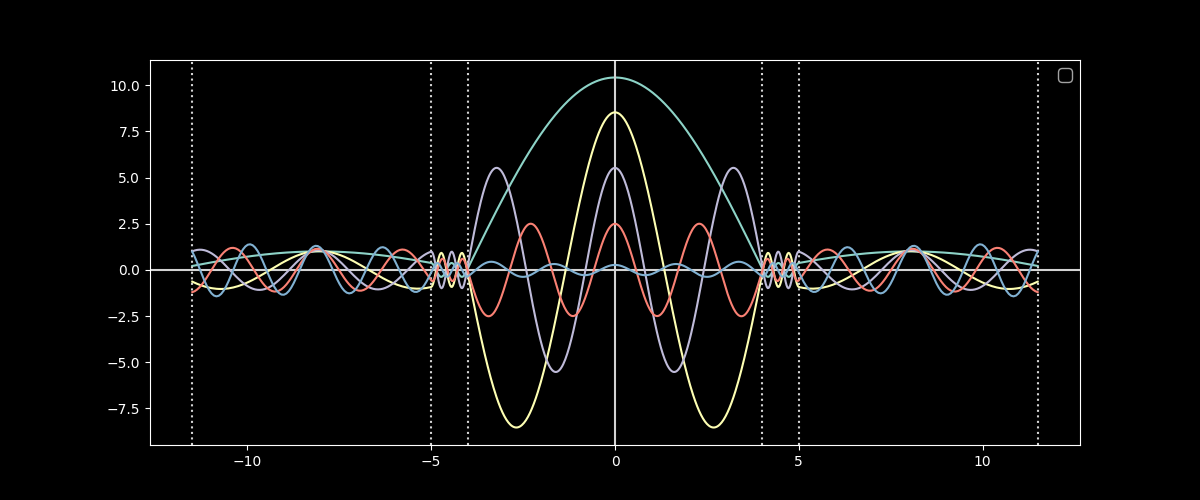

In [22]:
A.plot_field_1d(Fs1)
A.add_1d_plot(Fs2)
A.add_1d_plot(Fs3)
A.add_1d_plot(Fs4)
A.add_1d_plot(Fs5)


### Build "full" leaky field

At this point this is just to get an idea of combining leaky modes.  Scaling should be done via contour integration.

In [23]:
from scipy.integrate import quad
cfs = np.zeros(len(Fs))
alphas = np.zeros(len(Fs))
for i,F in enumerate(Fs):
    integrand = lambda x: F(x) * F(x).conjugate()
    cfs[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real
    integrand = lambda x: f0(x) * F(x).conjugate()
    alphas[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real

# Note: Not clear that this is correct process for scaling leaky fields

In [24]:
Full_leaky = lambda x, z: sum([Fs[i](x,z) * alphas[i]/cfs[i] for i in range(len(Fs))])

### 2D plots

In [25]:
xs = np.linspace(-20,20,1000)

In [26]:
fig, ax = A.plot_field_2d(Full_leaky, xs=xs, zmin=0, zmax=100, zref=2000, colorbar=False)
plt.axis('equal')

(-20.0, 20.0, 0.0, 100.0)